In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import spacy
from collections import Counter
import sklearn.preprocessing as sp
import string
from tqdm import tqdm
import seaborn as sns
import transformers

2023-04-20 10:15:10.709920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 10:15:10.843848: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/teradata/client/14.10/lib
2023-04-20 10:15:10.843872: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-20 10:15:11.540666: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open sh

In [2]:
import re
import csv
import random
import spacy
from nltk.corpus  import stopwords
import re
import os
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
from transformers import TFBertEmbeddings, BertConfig
from sentence_transformers import SentenceTransformer, util

In [3]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
import tensorflow as tf
import torch
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
import tensorboard

from sentence_transformers import SentenceTransformer, util

In [4]:
base_path = "/home/ayalcin/DBPEDIA"
data_path = "/home/ayalcin/DBPEDIA/DBP_wiki_data.csv"
test_path = "/home/ayalcin/DBPEDIA/DBPEDIA_test.csv"
val_path = "/home/ayalcin/DBPEDIA/DBPEDIA_val.csv"
train_path = "/home/ayalcin/DBPEDIA/DBPEDIA_train.csv"

In [5]:
df_train = pd.read_csv(train_path, encoding='utf-8-sig')
df_val = pd.read_csv(val_path, encoding='utf-8-sig')
df_test = pd.read_csv(test_path, encoding='utf-8-sig')
df_data = pd.read_csv(data_path, encoding='utf-8-sig')

In [6]:
import pickle
pickle_in = open('/home/ayalcin/mpnet-base-v2/df_test_sentence_encoded_text.obj', 'rb')
df_test_encoded_text = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open('/home/ayalcin/mpnet-base-v2/df_train_sentence_encoded_text.obj', 'rb')
df_train_encoded_text = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open('/home/ayalcin/mpnet-base-v2/df_val_sentence_encoded_text.obj', 'rb')
df_val_encoded_text = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open('/home/ayalcin/mpnet-base-v2/df_data_sentence_encoded_text.obj', 'rb')
df_data_encoded_text = pickle.load(pickle_in)
pickle_in.close()

In [7]:
label_encoder = LabelEncoder()
label_onhotencoder = OneHotEncoder(sparse=False)

train_encoded_l1_labels = label_encoder.fit_transform(df_train.l1)
val_encoded_l1_labels = label_encoder.transform(df_val.l1)
test_encoded_l1_labels = label_encoder.transform(df_test.l1)
data_encoded_l1_labels = label_encoder.transform(df_data.l1)

train_onehotencoded_l1_labels = label_onhotencoder.fit_transform(df_train.l1.to_numpy().reshape(-1,1))
val_onehotencoded_l1_labels = label_onhotencoder.transform(df_val.l1.to_numpy().reshape(-1,1))
test_onehotencoded_l1_labels = label_onhotencoder.transform(df_test.l1.to_numpy().reshape(-1,1))
data_onehotencoded_l1_labels = label_onhotencoder.transform(df_data.l1.to_numpy().reshape(-1,1))

In [8]:
df_train_encoded = pd.DataFrame()
df_train_encoded['text_encodings'] = df_train_encoded_text.tolist()
df_train_encoded["text"] = df_train.text.to_list()
df_train_encoded['l1'] = df_train.l1.to_list()
df_train_encoded['l2'] = df_train.l2.to_list()
df_train_encoded['l3'] = df_train.l3.to_list()
#df_train_encoded

df_test_encoded = pd.DataFrame()
df_test_encoded['text_encodings'] = df_test_encoded_text.tolist()
df_test_encoded["text"] = df_test.text.to_list()
df_test_encoded['l1'] = df_test.l1.to_list()
df_test_encoded['l2'] = df_test.l2.to_list()
df_test_encoded['l3'] = df_test.l3.to_list()
#df_test_encoded

df_val_encoded = pd.DataFrame()
df_val_encoded['text_encodings'] = df_val_encoded_text.tolist()
df_val_encoded["text"] = df_val.text.to_list()
df_val_encoded['l1'] = df_val.l1.to_list()
df_val_encoded['l2'] = df_val.l2.to_list()
df_val_encoded['l3'] = df_val.l3.to_list()
#df_val_encoded

#df_data_encoded = pd.DataFrame()
#df_data_encoded['text_encodings'] = df_data_encoded_text.tolist()
#df_data_encoded["text"] = df_data.text.to_list()
#df_data_encoded['l1'] = df_data.l1.to_list()
#df_data_encoded['l2'] = df_data.l2.to_list()
#df_data_encoded['l3'] = df_data.l3.to_list()
#df_data_encoded
df_train_encoded

,text_encodings,text,l1,l2,l3
0,"[-0.10363507270812988, 0.1812124252319336, 0.0...","William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,"[0.05650283396244049, 0.07600477337837219, 0.0...",Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"[-0.09026263654232025, 0.03454560041427612, -0...","Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,"[-0.003419243497774005, 0.2908671498298645, 0....",Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,"[-0.033124424517154694, 0.20675116777420044, 0...",The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding
...,...,...,...,...,...
240937,"[-0.07011406868696213, 0.2901493310928345, -0....",Charlie Thompson is a prominent journalist in ...,Agent,Person,Journalist
240938,"[-0.21219080686569214, 0.021147891879081726, 0...",The Northerly Stakes is a Perth Racing Group 3...,Event,Race,HorseRace
240939,"[0.09261240065097809, -0.350208044052124, 0.02...",HC Empor Rostock is a team handball club from ...,Agent,SportsTeam,HandballTeam
240940,"[-0.014504971913993359, -0.1529148668050766, -...",University of Surabaya (UBAYA) is a university...,Agent,EducationalInstitution,University


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((df_train_encoded_text, train_onehotencoded_l1_labels))
train_dataset = train_dataset.prefetch(AUTOTUNE).shuffle(len(train_dataset), reshuffle_each_iteration=True).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((df_val_encoded_text, val_onehotencoded_l1_labels))
val_dataset = val_dataset.prefetch(AUTOTUNE).shuffle(len(val_dataset), reshuffle_each_iteration=True).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((df_test_encoded_text, test_onehotencoded_l1_labels))
test_dataset = test_dataset.prefetch(AUTOTUNE).shuffle(len(test_dataset), reshuffle_each_iteration=True).batch(32)

data_dataset = tf.data.Dataset.from_tensor_slices((df_data_encoded_text, data_onehotencoded_l1_labels))
data_dataset = data_dataset.prefetch(AUTOTUNE).shuffle(len(data_dataset), reshuffle_each_iteration=True).batch(32)

2023-04-20 10:15:35.328516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
def dense_layers(input_tensor, layer_size, stage, block):

  layer1, layer2, layer3 = layer_size
  dense_base_name = 'dense' + str(stage) + block + '_branch_'
  bn_base_name = 'bn' + str(stage) + block  + '_branch_'
  #sc_base_name = 'shortcut' + str(stage) + block + '_branch_'

  x = layers.Dense(layer1, activation='relu', name = dense_base_name+'a') (input_tensor)
  x = layers.Dense(layer2, activation='relu', name = dense_base_name+'b') (x)
  x = layers.BatchNormalization(name=bn_base_name) (x)
  x = layers.Dense(layer3, activation='relu', name = dense_base_name+'c') (x)
  #x = layers.add([x, input_tensor], name=sc_base_name) (x)
  x = layers.Activation('relu') (x)

  return x

In [12]:
inputs = keras.Input(shape=(768,), name='Input_layer')
x = dense_layers(inputs, [652, 512, 256], 1, 'a')
x = dense_layers(x, [182, 128, 64], 2, 'a')
x = layers.Dense(52, activation='relu', name='dense3a_branch_a') (x)
x = layers.Dense(28, activation='relu', name='dense4a_branch_a') (x)
x = layers.BatchNormalization(name='batchnormalization') (x)
out = layers.Dense(9, activation='softmax', name='softmax_layer') (x)
model = keras.Model(inputs, out, name='supervised_model')
model.summary()

Model: "supervised_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 768)]             0         
                                                                 
 dense1a_branch_a (Dense)    (None, 652)               501388    
                                                                 
 dense1a_branch_b (Dense)    (None, 512)               334336    
                                                                 
 bn1a_branch_ (BatchNormaliz  (None, 512)              2048      
 ation)                                                          
                                                                 
 dense1a_branch_c (Dense)    (None, 256)               131328    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                  

In [13]:
# model.save('/home/ayalcin//Alp.Yalcin/Model_checkpoints/supervised_rt1')
best_model = keras.models.load_model('/home/ayalcin/supervised_sentence_embedding')
best_model.summary()

Model: "supervised_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 768)]             0         
                                                                 
 dense1a_branch_a (Dense)    (None, 652)               501388    
                                                                 
 dense1a_branch_b (Dense)    (None, 512)               334336    
                                                                 
 bn1a_branch_ (BatchNormaliz  (None, 512)              2048      
 ation)                                                          
                                                                 
 dense1a_branch_c (Dense)    (None, 256)               131328    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                  

In [14]:
pretrained_model = keras.Model(best_model.input, best_model.get_layer('batchnormalization').output)
train_prediction = pretrained_model.predict(df_train_encoded_text)
test_prediction = pretrained_model.predict(df_test_encoded_text)
val_prediction = pretrained_model.predict(df_val_encoded_text)
data_prediction = pretrained_model.predict(df_data_encoded_text)

pretrained_model.summary()

10712/10712 [==============================] - 26s 2ms/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 768)]             0         
                                                                 
 dense1a_branch_a (Dense)    (None, 652)               501388    
                                                                 
 dense1a_branch_b (Dense)    (None, 512)               334336    
                                                                 
 bn1a_branch_ (BatchNormaliz  (None, 512)              2048      
 ation)                                                          
                                                                 
 dense1a_branch_c (Dense)    (None, 256)               131328    
                                                                 
 activation (Activation)     (None, 256)               0         
 

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [16]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(train_prediction)

In [17]:
best_model = keras.models.load_model('/home/ayalcin/Model_checkpoints/gcp_models/supervised_sentence_embedding_rt1')
best_model.summary()

Model: "supervised_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 768)]             0         
                                                                 
 dense1a_branch_a (Dense)    (None, 652)               501388    
                                                                 
 dense1a_branch_b (Dense)    (None, 512)               334336    
                                                                 
 bn1a_branch_ (BatchNormaliz  (None, 512)              2048      
 ation)                                                          
                                                                 
 dense1a_branch_c (Dense)    (None, 256)               131328    
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                  

In [18]:
pretrained_model = keras.Model(best_model.input, best_model.get_layer('batchnormalization').output)
train_prediction = pretrained_model.predict(df_train_encoded_text)
test_prediction = pretrained_model.predict(df_test_encoded_text)
val_prediction = pretrained_model.predict(df_val_encoded_text)
data_prediction = pretrained_model.predict(df_data_encoded_text)

pretrained_model.summary()

10712/10712 [==============================] - 25s 2ms/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 768)]             0         
                                                                 
 dense1a_branch_a (Dense)    (None, 652)               501388    
                                                                 
 dense1a_branch_b (Dense)    (None, 512)               334336    
                                                                 
 bn1a_branch_ (BatchNormaliz  (None, 512)              2048      
 ation)                                                          
                                                                 
 dense1a_branch_c (Dense)    (None, 256)               131328    
                                                                 
 activation_4 (Activation)   (None, 256)               0         

In [19]:
train_prediction

array([[ 0.00781444,  0.01071493,  0.00245631, ...,  1.8443291 ,
        -1.591041  , -0.06295025],
       [ 0.00781444,  0.01071493,  0.00245631, ..., -0.497298  ,
         1.1775827 , -0.06295025],
       [ 0.00781444,  0.01071493,  0.00245631, ..., -1.524563  ,
         0.45051885, -0.06295025],
       ...,
       [ 0.00781444,  0.01071493,  0.00245631, ...,  1.3404577 ,
        -1.4396993 , -0.06295025],
       [ 0.00781444,  0.01071493,  0.00245631, ...,  1.2739899 ,
        -1.1265553 , -0.06295025],
       [ 0.00781444,  0.01071493,  0.00245631, ...,  0.05465603,
        -0.4699242 , -0.06295025]], dtype=float32)

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [21]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(train_prediction)

In [22]:
import matplotlib.pyplot as plt

# Prepare data
pca_data = PCA(n_components=2).fit_transform(train_prediction)

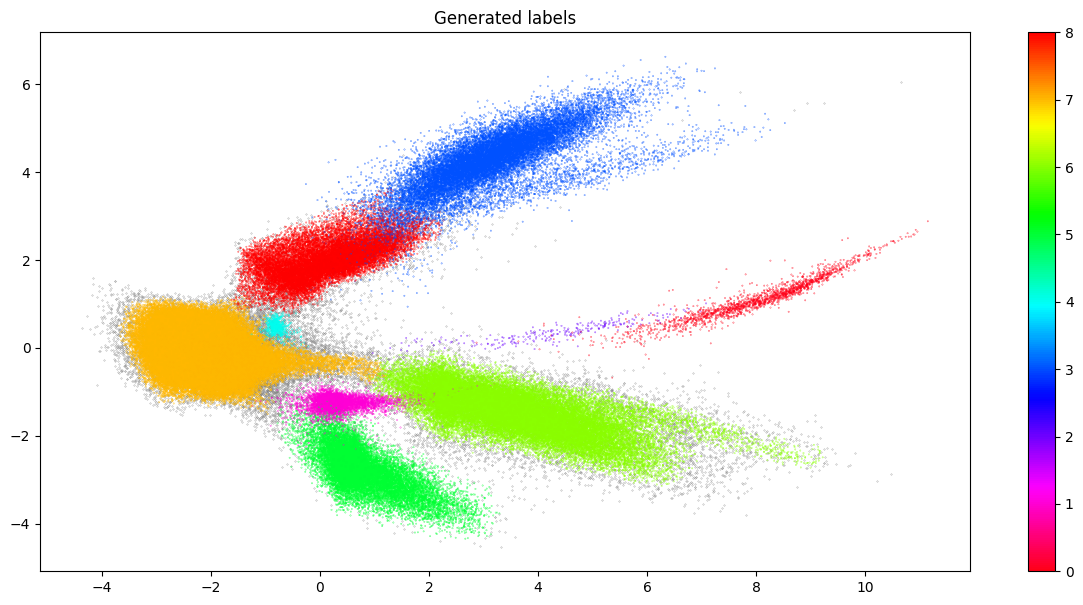

In [23]:
result = pd.DataFrame(pca_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(15, 7))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='gray', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.title('Generated labels')
plt.colorbar()

In [24]:
train_encoded_df = pd.DataFrame()
train_encoded_df["text_encodings"] = train_prediction.tolist()
train_encoded_df["text"] = df_train.text.to_list()
train_encoded_df["encoded_l1_labels"] = train_encoded_l1_labels.tolist()
train_encoded_df["l1"] = df_train.l1.to_list()

test_encoded_df = pd.DataFrame()
test_encoded_df["text_encodings"] = test_prediction.tolist()
test_encoded_df["text"] = df_test.text.to_list()
test_encoded_df["encoded_l1_labels"] = test_encoded_l1_labels.tolist()
test_encoded_df["l1"] = df_test.l1.to_list()

val_encoded_df = pd.DataFrame()
val_encoded_df["text_encodings"] = val_prediction.tolist()
val_encoded_df["text"] = df_val.text.to_list()
val_encoded_df["encoded_l1_labels"] = val_encoded_l1_labels.tolist()
val_encoded_df["l1"] = df_val.l1.to_list()

#text_encoded_df = pd.DataFrame()
#text_encoded_df["text_encodings"] = train_prediction.tolist()
#text_encoded_df["text"] = df_train.text.to_list()
#text_encoded_df["encoded_l1_labels"] = train_encoded_l1_labels.tolist()
#text_encoded_df["l1"] = df_train.l1.to_list()

In [25]:
from nltk.tokenize import word_tokenize
train_word_tokens = train_encoded_df.text.apply(word_tokenize)
train_word_tokens

0         [William, Alexander, Massey, (, October, 7, ,,...
1         [Lions, is, the, sixth, studio, album, by, Ame...
2         [Pirqa, (, Aymara, and, Quechua, for, wall, ,,...
3         [Cancer, Prevention, Research, is, a, biweekly...
4         [The, Princeton, University, Chapel, is, locat...
                                ...                        
240937    [Charlie, Thompson, is, a, prominent, journali...
240938    [The, Northerly, Stakes, is, a, Perth, Racing,...
240939    [HC, Empor, Rostock, is, a, team, handball, cl...
240940    [University, of, Surabaya, (, UBAYA, ), is, a,...
240941    [The, 1981, Seattle, Seahawks, season, was, th...
Name: text, Length: 240942, dtype: object

In [26]:
import re
punctuation = re.compile(r'[-.?–//!,:;()\\|0-9]')

In [27]:
train_punctuation = []
for i in range(0,len(train_word_tokens)):
    sentence = train_word_tokens[i]
    post_punctuation_train = []
    for words in sentence:
        word = punctuation.sub("",words)
        word = re.sub(re.escape("''"),'',word)
        word = re.sub(re.escape("'s"),'',word)
        if len(word)>0:
            post_punctuation_train.append(word)
    train_punctuation.append(post_punctuation_train)

In [28]:
train_punctuation_escaped = []
for i in range(0,len(train_punctuation)):
    sentence = train_punctuation[i]
    post_escaped_train = []
    for words in sentence:
        word = re.sub("'s",'', words)
        if len(word)>0:
            post_escaped_train.append(word)
    train_punctuation_escaped.append(post_escaped_train)
        
    
    
#     #re.sub(re.escape("-"), '', train_punctuation)

In [29]:
train_punctuation_lower = []
for i in range (0,len(train_punctuation)):
    sentence = train_punctuation[i]
    lower_punctuation = []
    for words in sentence:
        words= words.lower()
        lower_punctuation.append(words)
    train_punctuation_lower.append(lower_punctuation)

In [30]:
from nltk.corpus import stopwords
stop_words=stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
train_stop_words_removed = []
for i in range(0,len(train_punctuation_lower)):
    sentence = train_punctuation_lower[i]
    filtered_sent=[]
    for w in sentence:
        if w not in stop_words:
            filtered_sent.append(w)
    train_stop_words_removed.append(filtered_sent)


In [32]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [33]:
train_stop_words_removed_lemmatized = []
for i in range(0,len(train_stop_words_removed)):
    sentence = train_stop_words_removed[i]
    lemmatize=[]
    for w in sentence:
        w = lemmatizer.lemmatize(w)
        lemmatize.append(w)
    train_stop_words_removed_lemmatized.append(lemmatize)

In [34]:
from nltk.probability import FreqDist
train_stop_words_removed_lemmatized_series = pd.Series(train_stop_words_removed_lemmatized)
train_frequency_word_tokens = train_stop_words_removed_lemmatized_series.apply(FreqDist)

In [35]:
train_encoded_df['tokenized_text'] = train_stop_words_removed_lemmatized
train_encoded_df['hdbscan_predicted_labels'] = cluster.labels_
train_encoded_df[train_encoded_df.l1 == "Agent"]

,text_encodings,text,encoded_l1_labels,l1,tokenized_text,hdbscan_predicted_labels
0,"[0.007814435288310051, 0.010714929550886154, 0...","William Alexander Massey (October 7, 1856 – Ma...",0,Agent,"[william, alexander, massey, october, march, u...",7
6,"[0.007814435288310051, 0.010714929550886154, 0...","The 1st Battalion, 68th Armor Regiment (1–68 A...",0,Agent,"[st, battalion, th, armor, regiment, armor, ba...",7
7,"[0.007814435288310051, 0.010714929550886154, 0...",John Warren Davis (commonly known as J. Warren...,0,Agent,"[john, warren, davis, commonly, known, j, warr...",7
8,"[0.007814435288310051, 0.010714929550886154, 0...","Alfrēds Hartmanis (November 1, 1881, Riga, Lat...",0,Agent,"[alfrēds, hartmanis, november, riga, latvia, j...",7
9,"[0.007814435288310051, 0.010714929550886154, 0...",The International Association of Plumbing and ...,0,Agent,"[international, association, plumbing, mechani...",-1
...,...,...,...,...,...,...
240932,"[0.007814435288310051, 0.010714929550886154, 0...",K. H. Ting or Ting Kuang-hsun (simplified Chin...,0,Agent,"[k, h, ting, ting, kuanghsun, simplified, chin...",7
240935,"[0.007814435288310051, 0.010714929550886154, 0...","Thomas Osborne, 1st Duke of Leeds, KG (20 Febr...",0,Agent,"[thomas, osborne, st, duke, leeds, kg, februar...",7
240937,"[0.007814435288310051, 0.010714929550886154, 0...",Charlie Thompson is a prominent journalist in ...,0,Agent,"[charlie, thompson, prominent, journalist, pen...",7
240939,"[0.007814435288310051, 0.010714929550886154, 0...",HC Empor Rostock is a team handball club from ...,0,Agent,"[hc, empor, rostock, team, handball, club, ros...",7


In [36]:
Agent_words = []
Device_words = []
Event_words = []
Place_words = []
Species_words = []
SportsSeason_words = []
TopicalConcept_words = []
UnitOfWork_words = []
Work_words = []
for i in range(0,train_encoded_df.encoded_l1_labels.nunique()):
    for classes in train_encoded_df.tokenized_text[train_encoded_df.encoded_l1_labels == i].reset_index(drop=True):
        for words in classes:
            if i == 0:
                Agent_words.append(words)
            if i == 1:
                Device_words.append(words)
            if i == 2:
                Event_words.append(words)
            if i == 3:
                Place_words.append(words)
            if i == 4:
                Species_words.append(words)
            if i == 5:
                SportsSeason_words.append(words)
            if i == 6: 
                TopicalConcept_words.append(words)
            if i == 7:
                UnitOfWork_words.append(words)
            if i == 8:
                Work_words.append(words)

In [37]:
Agent_words_fd = FreqDist(Agent_words)
Device_words_fd = FreqDist(Device_words)
Event_words_fd = FreqDist(Event_words)
Place_words_fd = FreqDist(Place_words)
Species_words_fd = FreqDist(Species_words)
SportsSeason_words_fd = FreqDist(SportsSeason_words)
TopicalConcept_words_fd = FreqDist(TopicalConcept_words)
UnitOfWork_words_fd = FreqDist(UnitOfWork_words)
Work_words_fd = FreqDist(Work_words)

In [38]:
train_stop_words_removed = []
for i in range(0,len(train_punctuation_lower)):
    sentence = train_punctuation_lower[i]
    filtered_sent=[]
    for w in sentence:
        if w not in stop_words:
            filtered_sent.append(w)
    train_stop_words_removed.append(filtered_sent)

In [39]:
from collections import Counter, OrderedDict
import operator
from nltk.corpus import wordnet as wn


In [40]:
Agent_hyper_words_1 = []
for words in Agent_words:
    for ss in wn.synsets(words):
        for hyper in ss.hypernyms():
#            print(hyper)
#            print (ss, hyper)
            Agent_hyper_words_1.append(hyper.name())

In [41]:
Agent_hyper_words_1_fd = FreqDist(Agent_hyper_words_1)
Agent_hyper_words_1_fd.most_common(20)

[('act.v.01', 360724),
 ('be.v.01', 317689),
 ('time_period.n.01', 316534),
 ('make.v.03', 315901),
 ('move.v.02', 261936),
 ('travel.v.01', 257302),
 ('change.v.01', 234469),
 ('person.n.01', 217085),
 ('change.v.02', 209632),
 ('have.v.02', 181848),
 ('perform.v.03', 181200),
 ('use.v.01', 166278),
 ('gregorian_calendar_month.n.01', 162633),
 ('act.v.02', 159408),
 ('re-create.v.01', 156621),
 ('activity.n.01', 151901),
 ('unit.n.03', 111027),
 ('gamble.v.02', 110353),
 ('body.n.02', 108422),
 ('digit.n.01', 107812)]

In [42]:
Agent_hyper_words_2 = []
for word in Agent_hyper_words_1:
    hyper = wn.synset(word).hypernyms()
    if hyper == []:
        Agent_hyper_words_2.append(word.split())
    else:
        Agent_hyper_words_2.append(hyper)

In [43]:
Agent_hyper_words_2_2 = []
for i in range (0,len(Agent_hyper_words_2)):
    for hypers in Agent_hyper_words_2[i]:
        if type(hypers) == str:
             Agent_hyper_words_2_2.append(hypers)
        else:
            Agent_hyper_words_2_2.append(hypers.name())

In [44]:
Agent_hyper_words_2_fd = FreqDist(Agent_hyper_words_2_2)
Agent_hyper_words_2_fd.most_common(20)

[('make.v.03', 818266),
 ('change.v.01', 683729),
 ('person.n.01', 572122),
 ('change.v.02', 561518),
 ('move.v.02', 558416),
 ('travel.v.01', 501368),
 ('act.v.01', 480108),
 ('be.v.01', 438094),
 ('activity.n.01', 357558),
 ('fundamental_quantity.n.01', 321162),
 ('social_group.n.01', 299017),
 ('act.n.02', 293168),
 ('organization.n.01', 273956),
 ('organism.n.01', 255311),
 ('use.v.01', 252580),
 ('get.v.01', 243250),
 ('re-create.v.01', 241122),
 ('abstraction.n.06', 228800),
 ('artifact.n.01', 227206),
 ('causal_agent.n.01', 225071)]

In [45]:
Agent_hyper_words_3 = []
for word in Agent_hyper_words_2_2:
    hyper = wn.synset(word).hypernyms()
    if hyper == []:
        Agent_hyper_words_3.append(word.split())
    else:
        Agent_hyper_words_3.append(hyper)

In [46]:
Agent_hyper_words_3_2 = []
for i in range (0,len(Agent_hyper_words_3)):
    for hypers in Agent_hyper_words_3[i]:
        if type(hypers) == str:
             Agent_hyper_words_3_2.append(hypers)
        else:
            Agent_hyper_words_3_2.append(hypers.name())

In [47]:
Agent_hyper_words_3_fd = FreqDist(Agent_hyper_words_3_2)
Agent_hyper_words_3_fd.most_common(20)

[('make.v.03', 1306245),
 ('change.v.01', 916231),
 ('change.v.02', 886038),
 ('move.v.02', 805462),
 ('person.n.01', 763551),
 ('abstraction.n.06', 720959),
 ('act.v.01', 664123),
 ('act.n.02', 663295),
 ('event.n.01', 659766),
 ('travel.v.01', 623376),
 ('organism.n.01', 581700),
 ('group.n.01', 580730),
 ('causal_agent.n.01', 578621),
 ('artifact.n.01', 523332),
 ('be.v.01', 480314),
 ('measure.n.02', 458068),
 ('physical_entity.n.01', 452982),
 ('social_group.n.01', 423501),
 ('think.v.03', 390817),
 ('entity.n.01', 345815)]

In [48]:
Agent_hyper_words_1_fd_50 = set()
for i in range(0,len(Agent_hyper_words_1_fd.most_common(50))):
    Agent_hyper_words_1_fd_50.add(Agent_hyper_words_1_fd.most_common(50)[i][0])

In [49]:
import networkx as nx
import matplotlib.pyplot as pl
from nltk.corpus import wordnet as wn
  
def wordnet_graph(words):
      

#       Construct a semantic graph and labels for a set of object categories using 
#       WordNet and NetworkX. 
     
#      Parameters: 
#      ----------
#      words : set
#          Set of words for all the categories. 
         
#      Returns: 
#      -------
#      graph : graph
#          Graph object containing edges and nodes for the network. 
#      labels : dict
#          Dictionary of all synset labels. 
     
    graph = nx.Graph()
    labels = {}
    seen = set()
     
    def recurse(s):
         
#          """ Recursively move up semantic hierarchy and add nodes / edges """  
 
        if not s in seen:                               # if not seen...
            seen.add(s)                                 # add to seen
            graph.add_node(s.name)                      # add node
            labels[s.name] = s.name().split(".")[0]     # add label
            hypernyms = s.hypernyms()                   # get hypernyms
 
            for s1 in hypernyms:                        # for hypernyms
                graph.add_node(s1.name)                 # add node
                graph.add_edge(s.name, s1.name)         # add edge between
                recurse(s1)                             # do so until top
      
     # build network containing all categories          
    for word in words:                                  # for all categories
        s = wn.synset(str(word))
#        s = wn.synset(str(word) + str('.n.01'))         # create synset            
        recurse(s)                                      # call recurse
     
     # return the graph and labels    
    return graph , labels

In [50]:
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout

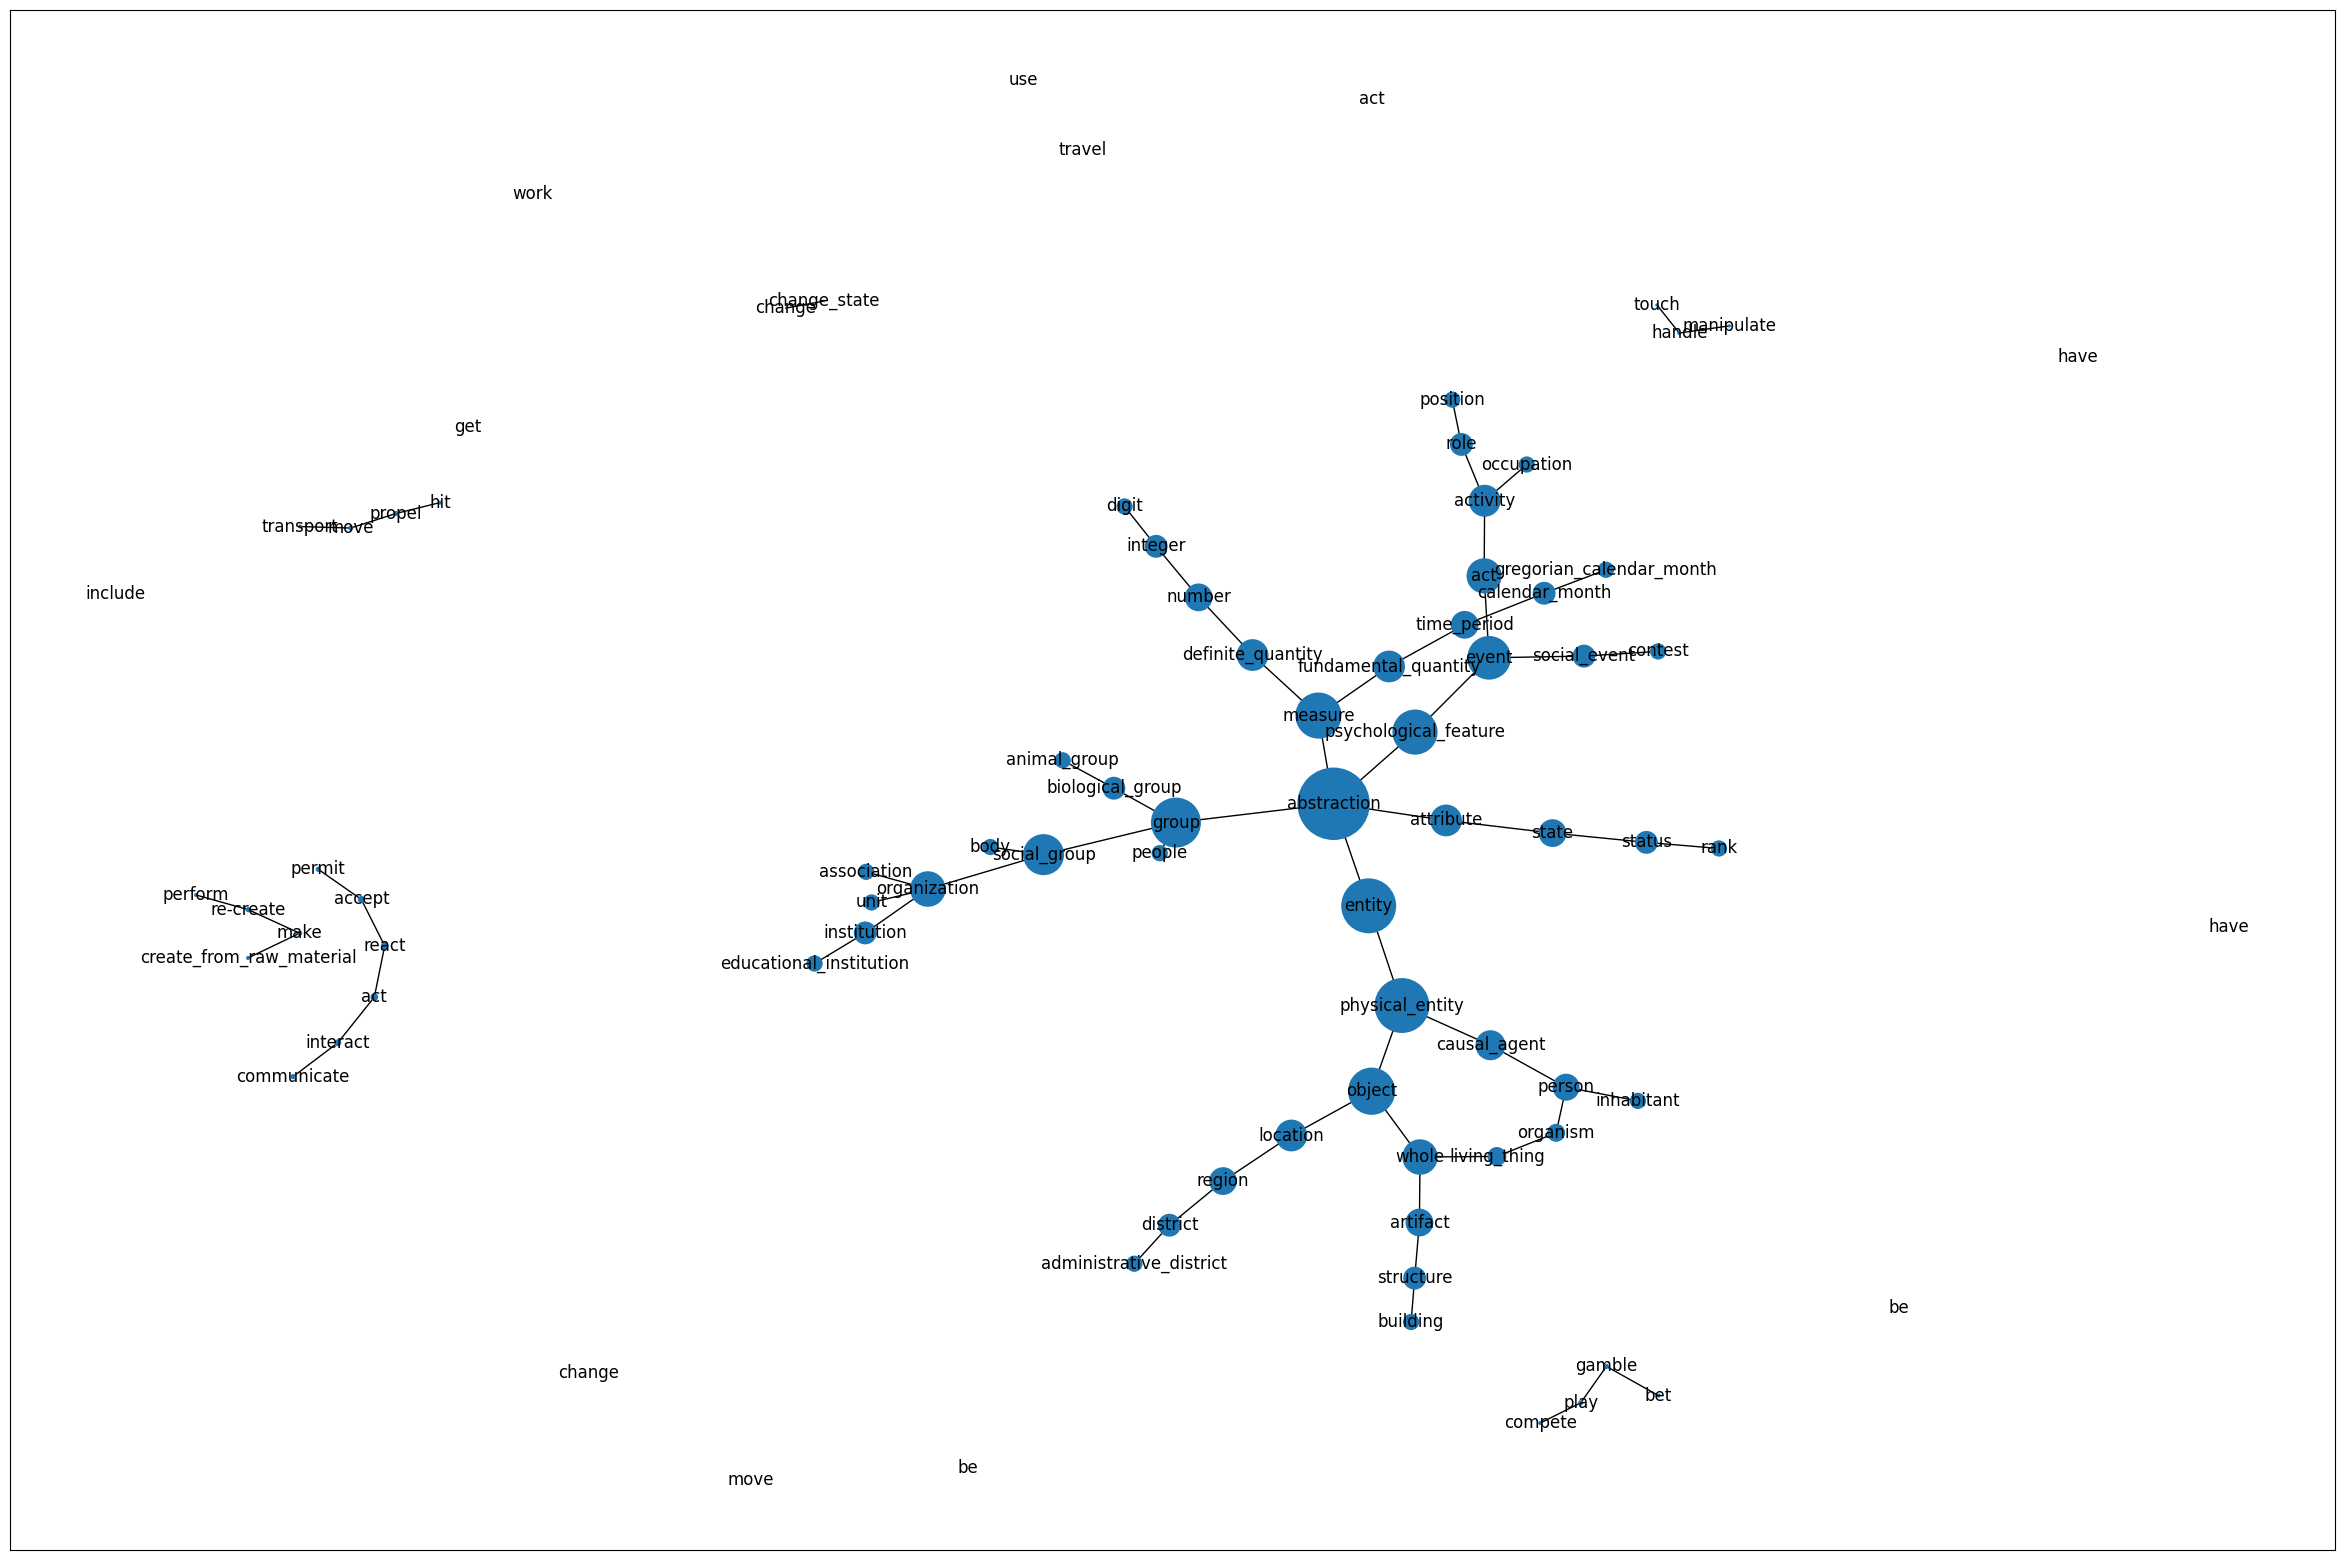

In [51]:
# create the graph and labels
graph, labels = wordnet_graph(Agent_hyper_words_1_fd_50)

# draw the graph
#nx.closure_graph(graph)
pos=nx.spring_layout(graph)
index = nx.betweenness_centrality(graph,endpoints=True)
plt.rc('figure', figsize=(30, 20))
node_size = [index[n]*10000 for n in graph]
nx.draw_networkx(graph, pos=pos,node_size=node_size, labels=labels, alpha=1, linewidths=0)
pl.show()

In [52]:
pip list | grep GraphRicciCurvature

GraphRicciCurvature               0.5.3.1
Note: you may need to restart the kernel to use updated packages.


In [53]:
import networkx as nx

# Prepare data
pca_data = PCA(n_components=2).fit_transform(train_prediction)
result = pd.DataFrame(pca_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Create a NetworkX graph object
graph = nx.Graph()

# Add nodes to the graph
for i in range(len(result)):
    graph.add_node(i, pos=(result['x'][i], result['y'][i]))

# Add edges to the graph
for i in range(len(result)):
    for j in range(i+1, len(result)):
        d = np.sqrt((result['x'][i]-result['x'][j])**2 + (result['y'][i]-result['y'][j])**2)
        graph.add_edge(i, j, weight=d)

# Run GraphRicciCurvature algorithm on the graph
from GraphRicciCurvature.OllivierRicci import OllivierRicci
rc = OllivierRicci(graph, alpha=0.5, verbose="INFO")
rc.compute_ricci_curvature()


KeyboardInterrupt: 

In [ ]:
import networkx as nx
import numpy as np
from GraphRicciCurvature.OllivierRicci import OllivierRicci
from GraphRicciCurvature.FormanRicci import FormanRicci
#from GraphRicciCurvature.RicciCurvature import RicciCurvature
import matplotlib.pyplot as plt

# create the graph and labels
graph, labels = wordnet_graph(Agent_hyper_words_1_fd_50)
# initialize the Ollivier-Ricci curvature object
rc = OllivierRicci(graph, alpha=0.5, verbose='INFO')

# compute the curvature values for each edge
curvature_values = rc.compute_ricci_curvature()

for u, v, attrs in graph.edges.data():
    attrs['ricciCurvature'] = curvature_values[(u, v)]

# visualize the graph with edge thickness proportional to Ricci curvature
pos = nx.spring_layout(graph)
edge_thickness = [np.abs(graph[u][v][k]['ricciCurvature']) for u, v, k in graph.edges]
nx.draw_networkx(graph, pos=pos, node_size=20, with_labels=False, width=edge_thickness, edge_color='b', alpha=0.8, cmap=plt.cm.Blues)
plt.show()


### Hiearchical Clustering

In [ ]:
import hdbscan
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy

# Run HDBSCAN clustering
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(val_prediction)

# Prepare data for visualization
pca_data = PCA(n_components=2).fit_transform(val_prediction)
result = pd.DataFrame(pca_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Perform hierarchical clustering on top of HDBSCAN clustering
linkage_matrix = hierarchy.linkage(val_prediction, method='ward')
flat_clusters = hierarchy.fcluster(linkage_matrix, t=40, criterion='distance')

# # Add hierarchical cluster labels to the result DataFrame
# result['hierarchical_labels'] = flat_clusters

# # Visualize dendrogram
# fig, ax = plt.subplots(figsize=(15, 7))
# dendrogram = hierarchy.dendrogram(linkage_matrix)

# # Visualize clusters
# fig, ax = plt.subplots(figsize=(15, 7))
# outliers = result.loc[result.labels == -1, :]
# clustered = result.loc[result.labels != -1, :]
# plt.scatter(outliers.x, outliers.y, color='gray', s=0.05)
# plt.scatter(clustered.x, clustered.y, c=clustered.hierarchical_labels, s=0.05, cmap='hsv_r')
# plt.title('Generated labels')
# plt.colorbar()


In [ ]:
# Add hierarchical cluster labels to the result DataFrame
result['hierarchical_labels'] = flat_clusters

# Visualize dendrogram
fig, ax = plt.subplots(figsize=(15, 7))
dendrogram = hierarchy.dendrogram(linkage_matrix)

# Visualize clusters
fig, ax = plt.subplots(figsize=(15, 7))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='gray', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.hierarchical_labels, s=0.05, cmap='hsv_r')
plt.title('Generated labels')
plt.colorbar()


### Graph Ricci Curvature

In [ ]:
# import sys
# sys.path.append("../")


import networkx as nx
import numpy as np
import math

# matplotlib setting
%matplotlib inline
import matplotlib.pyplot as plt

# to print logs in jupyter notebook
import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

# load GraphRicciCuravture package
from GraphRicciCurvature.OllivierRicci import OllivierRicci
from GraphRicciCurvature.FormanRicci import FormanRicci


# load python-louvain for modularity computation
import community.community_louvain as community_louvain

# for ARI computation
from sklearn import preprocessing, metrics

In [ ]:

import GraphRicciCurvature
print(GraphRicciCurvature.__version__)

In [ ]:
G = nx.karate_club_graph()
for (n1, n2, d) in G.edges(data=True):
    d.clear()   # remove edge weight 

In [ ]:
print(G)


In [ ]:
orc = OllivierRicci(G, alpha=0.5, verbose="TRACE")


In [ ]:
orc.compute_ricci_curvature()
G_orc = orc.G.copy()  # save an intermediate result


In [ ]:
def show_results(G, curvature="ricciCurvature"):

    # Print the first five results
    print("Karate Club Graph, first 5 edges: ")
    for n1,n2 in list(G.edges())[:5]:
        print("Ricci curvature of edge (%s,%s) is %f" % (n1 ,n2, G[n1][n2][curvature]))

    # Plot the histogram of Ricci curvatures
    plt.subplot(2, 1, 1)
    ricci_curvtures = nx.get_edge_attributes(G, curvature).values()
    plt.hist(ricci_curvtures,bins=20)
    plt.xlabel('Ricci curvature')
    plt.title("Histogram of Ricci Curvatures (Karate Club)")

    # Plot the histogram of edge weights
    plt.subplot(2, 1, 2)
    weights = nx.get_edge_attributes(G, "weight").values()
    plt.hist(weights,bins=20)
    plt.xlabel('Edge weight')
    plt.title("Histogram of Edge weights (Karate Club)")

    plt.tight_layout()
    
show_results(G_orc)

In [ ]:
frc = FormanRicci(G, verbose="TRACE")

In [ ]:
frc.compute_ricci_curvature()
G_frc = frc.G.copy()  # save an intermediate result

In [ ]:
show_results(G_frc,curvature="formanCurvature")

In [ ]:
# Start a Ricci flow with Lin-Yau's probability distribution setting with 4 process.
orf = OllivierRicci(G, alpha=0.5, base=1, exp_power=0, proc=4, verbose="INFO")

# Do Ricci flow for 2 iterations
orf.compute_ricci_flow(iterations=2)

In [ ]:
orf.set_verbose("ERROR") # mute logs
orf.compute_ricci_flow(iterations=50)
G_rf = orf.G.copy()

In [ ]:
show_results(G_rf)


In [ ]:
def draw_graph(G, clustering_label="club"):
    """
    A helper function to draw a nx graph with community.
    """
    complex_list = nx.get_node_attributes(G, clustering_label)

    le = preprocessing.LabelEncoder()
    node_color = le.fit_transform(list(complex_list.values()))

    nx.draw_spring(G, nodelist=G.nodes(),
                   node_color=node_color,
                   cmap=plt.cm.rainbow,
                   alpha=0.8)

draw_graph(G_rf)

In [ ]:
def ARI(G, clustering, clustering_label="club"):
    """
    Computer the Adjust Rand Index (clustering accuracy) of "clustering" with "clustering_label" as ground truth.

    Parameters
    ----------
    G : NetworkX graph
        A given NetworkX graph with node attribute "clustering_label" as ground truth.
    clustering : dict or list or list of set
        Predicted community clustering.
    clustering_label : str
        Node attribute name for ground truth.

    Returns
    -------
    ari : float
        Adjust Rand Index for predicted community.
    """

    complex_list = nx.get_node_attributes(G, clustering_label)

    le = preprocessing.LabelEncoder()
    y_true = le.fit_transform(list(complex_list.values()))

    if isinstance(clustering, dict):
        # python-louvain partition format
        y_pred = np.array([clustering[v] for v in complex_list.keys()])
    elif isinstance(clustering[0], set):
        # networkx partition format
        predict_dict = {c: idx for idx, comp in enumerate(clustering) for c in comp}
        y_pred = np.array([predict_dict[v] for v in complex_list.keys()])
    elif isinstance(clustering, list):
        # sklearn partition format
        y_pred = clustering
    else:
        return -1

    return metrics.adjusted_rand_score(y_true, y_pred)



def my_surgery(G_origin: nx.Graph(), weight="weight", cut=0):
    """A simple surgery function that remove the edges with weight above a threshold

    Parameters
    ----------
    G_origin : NetworkX graph
        A graph with ``weight`` as Ricci flow metric to cut.
    weight: str
        The edge weight used as Ricci flow metric. (Default value = "weight")
    cut: float
        Manually assigned cutoff point.

    Returns
    -------
    G : NetworkX graph
        A graph after surgery.
    """
    G = G_origin.copy()
    w = nx.get_edge_attributes(G, weight)

    assert cut >= 0, "Cut value should be greater than 0."
    if not cut:
        cut = (max(w.values()) - 1.0) * 0.6 + 1.0  # Guess a cut point as default

    to_cut = []
    for n1, n2 in G.edges():
        if G[n1][n2][weight] > cut:
            to_cut.append((n1, n2))
    print("*************** Surgery time ****************")
    print("* Cut %d edges." % len(to_cut))
    G.remove_edges_from(to_cut)
    print("* Number of nodes now: %d" % G.number_of_nodes())
    print("* Number of edges now: %d" % G.number_of_edges())
    cc = list(nx.connected_components(G))
    print("* Modularity now: %f " % nx.algorithms.community.quality.modularity(G, cc))
    print("* ARI now: %f " % ARI(G, cc))
    print("*********************************************")

    return G

In [ ]:
draw_graph(my_surgery(G_rf, cut=1.5))


In [ ]:
draw_graph(my_surgery(G_rf, cut=1.0))


In [ ]:
def check_accuracy(G_origin, weight="weight", clustering_label="value", plot_cut=True):
    """To check the clustering quality while cut the edges with weight using different threshold

    Parameters
    ----------
    G_origin : NetworkX graph
        A graph with ``weight`` as Ricci flow metric to cut.
    weight: float
        The edge weight used as Ricci flow metric. (Default value = "weight")
    clustering_label : str
        Node attribute name for ground truth.
    plot_cut: bool
        To plot the good guessed cut or not.

    """
    G = G_origin.copy()
    modularity, ari = [], []
    maxw = max(nx.get_edge_attributes(G, weight).values())
    cutoff_range = np.arange(maxw, 1, -0.025)

    for cutoff in cutoff_range:
        edge_trim_list = []
        for n1, n2 in G.edges():
            if G[n1][n2][weight] > cutoff:
                edge_trim_list.append((n1, n2))
        G.remove_edges_from(edge_trim_list)

        # Get connected component after cut as clustering
        clustering = {c: idx for idx, comp in enumerate(nx.connected_components(G)) for c in comp}

        # Compute modularity and ari
        modularity.append(community_louvain.modularity(clustering, G, weight))
        ari.append(ARI(G, clustering, clustering_label=clustering_label))

    plt.xlim(maxw, 0)
    plt.xlabel("Edge weight cutoff")
    plt.plot(cutoff_range, modularity, alpha=0.8)
    plt.plot(cutoff_range, ari, alpha=0.8)

    if plot_cut:
        good_cut = -1
        mod_last = modularity[-1]
        drop_threshold = 0.01  # at least drop this much to considered as a drop for good_cut
    
        # check drop from 1 -> maxw
        for i in range(len(modularity) - 1, 0, -1):
            mod_now = modularity[i]
            if mod_last > mod_now > 1e-4 and abs(mod_last - mod_now) / mod_last > drop_threshold:
                if good_cut != -1:
                    print("Other cut:%f, diff:%f, mod_now:%f, mod_last:%f, ari:%f" % (
                        cutoff_range[i + 1], mod_last - mod_now, mod_now, mod_last, ari[i + 1]))
                else:
                    good_cut = cutoff_range[i + 1]
                    print("*Good Cut:%f, diff:%f, mod_now:%f, mod_last:%f, ari:%f" % (
                        good_cut, mod_last - mod_now, mod_now, mod_last, ari[i + 1]))
            mod_last = mod_now

        plt.axvline(x=good_cut, color="red")
        plt.legend(['Modularity', 'Adjust Rand Index', 'Good cut'])
    else:
        plt.legend(['Modularity', 'Adjust Rand Index'])

In [ ]:
check_accuracy(G_rf,clustering_label="club",plot_cut=False)


In [ ]:
draw_graph(my_surgery(G_rf, cut=1.05))
